# Plot the hypergraph

----

- Note: The code is based on research from the paper [Persistent hyperdigraph homology and persistent hyperdigraph Laplacians](https://arxiv.org/abs/2304.00345). If you find this code helpful, feel free to cite the article as a reference.

In [ ]:
""" Summary: plot the hypergraph from hyperedges (dict)

    Author:
        Dong Chen
    Create:
        2023-01-28
    Modify:
        2023-01-28
    Dependencies:
        python                    3.7.4
        numpy                     1.21.5
        matplotlib                3.5.1
        scipy                     1.7.3
"""

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import ArrowStyle
import matplotlib.patheffects as pe
import scipy.spatial

In [10]:
def generate_rounded_hull_data(coords, padding=0.1):

    if np.shape(coords)[0] > 2:
        hull = scipy.spatial.ConvexHull(coords)
        hull_points = coords[hull.vertices]
        hull_points = np.concatenate([hull_points[[-1]], hull_points, hull_points[[0]]])
    elif np.shape(coords)[0] == 2:
        hull_points = np.concatenate([coords[[-1]], coords, coords[[0]]])

    line_points = []
    for i in range(1, hull_points.shape[0] - 1):
        norm_next = np.flip(hull_points[i] - hull_points[i + 1]) * np.array([-1, 1], dtype=float)
        norm_next /= np.linalg.norm(np.array(norm_next))
        norm_prev = np.flip(hull_points[i - 1] - hull_points[i]) * np.array([-1, 1], dtype=float)
        norm_prev /= np.linalg.norm(norm_prev)

        angle_next = np.rad2deg(np.arccos(np.dot(norm_next, [1,0])))
        if norm_next[1] < 0:
            angle_next = 360 - angle_next
        angle_prev = np.rad2deg(np.arccos(np.dot(norm_prev, [1,0])))
        if norm_prev[1] < 0:
            angle_prev = 360 - angle_prev

        # xy for arc
        if angle_next < angle_prev:
            theta = np.deg2rad(np.arange(angle_prev, 360+angle_next, 0.5))
        else:
            theta = np.deg2rad(np.arange(angle_prev, angle_next, 0.5))
        x = padding * np.cos(theta) + hull_points[i][0]
        y = padding * np.sin(theta) + hull_points[i][1]
        line_points.append(np.vstack([x, y]).T)
    
    all_line_points = np.vstack(line_points)

    return all_line_points

In [6]:
def fig_hypergraph(coords: np.array, hyper_edge: dict, figname: str=None) -> None:

    
    # generate_all_1_path
    collect_1_path = []
    for hyperedge in hyper_edge[2]:
        collect_1_path.append(hyperedge[0:2])
        collect_1_path.append(hyperedge[1::])
    dummy_1_path = list(set(collect_1_path).difference(set(hyper_edge[1])))

    # figure
    fig_l = 3
    fig_h = 5
    pad_space = 0.1
    fig, ax = plt.subplots(
        figsize=[fig_l, fig_h],
        nrows=1, ncols=1,
        gridspec_kw={
            'wspace': 0.01/fig_l, 'hspace': 0.01/fig_l,
            # 'height_ratios': [0.8, 0.7, 0.6],
            'left': pad_space/fig_l, 'right': 1-pad_space/fig_l,
            'bottom': pad_space/fig_h, 'top': 1-pad_space/fig_h,
        },
    )

    font_dict = dict(
        stretch='semi-condensed', style='normal', size=20,
        family='times new roman',  # 'times new roma', 'arial'
    )

    # plot the background for dim 2, 1
    hyperedge_color = {2: '#F0A2AF', 1: "#4B5B75"}
    for dim_n in [2, 1]:
        path_seqs = hyper_edge[dim_n]
        for path_seq in path_seqs:
            arc_coords = generate_rounded_hull_data(coords[path_seq, :], padding=0.07+0.08*dim_n)
            ax.fill(
                arc_coords[:, 0], arc_coords[:, 1], alpha=0.8,
                facecolor=hyperedge_color[dim_n], linewidth=1, edgecolor='k'
            )

    # plot node
    for node in hyper_edge[0]:
        ax.plot(coords[node, 0], coords[node, 1], ls='none', marker='o', mec='k', mfc='k', ms=18, alpha=1)
    ax.scatter(0, 2, s=18**2, facecolors='w', edgecolors='k', linestyle='--', zorder=10)

    # add text
    # ax.text(1.1, 0.1, s='1', c='k', ha='center', va='center', **font_dict)
    
    ax.set_ylim([-2.38, 2.38])
    ax.set_xlim([-1.32, 1.32])
    plt.axis('off')

    if figname is None:
        plt.show()
    else:
        fig_name = figname
        if fig_name.split('.')[-1] in ['png', 'jpg']:
            plt.savefig(f'{fig_name}', transparent=0, dpi=600, format='png')  # bbox_inches='tight'
        else:
            plt.savefig(f'{fig_name}')
    plt.close()
    return None

In [8]:
# data
# nodes = {1: [0, 2], 2: [1, 1], 3: [1, -1], 4: [0, -2], 5: [-1, -1], 6: [-1, 1]}
coords = np.array([[0, 2], [1, 1], [1, -1], [0, -2], [-1, -1], [-1, 1]])
hyper_edge = {
    0: [(1,), (2,),  (3,),  (4,),  (5,)],
    1: [(0, 1), (2, 5), (2, 4), (4, 1), (1, 2), (2, 3), (3, 4)],
    2: [(0, 1, 2), (0, 5, 1), (2, 4, 1), (2, 3, 4)],
}
save_figure_name = 'hypergraph.png'

In [11]:
fig_hypergraph(coords, hyper_edge, figname=save_figure_name)

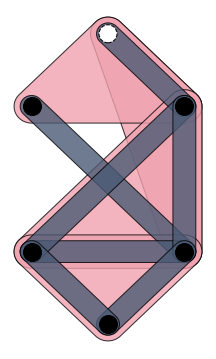

In [12]:
fig_hypergraph(coords, hyper_edge, figname=None)
